In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image

In [ ]:
!unzip "./drive/MyDrive/DermDiagnose/DermDiagnose_dataset_v2.zip" -d "/content/DermDiagnose_dataset_v2"

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/DermDiagnose_dataset_v2/val/Systemic Disease/lipoid-proteinosis-8.jpg  
  inflating: /content/DermDiagnose_dataset_v2/val/Systemic Disease/neurofibromatosis-14.jpg  
  inflating: /content/DermDiagnose_dataset_v2/val/Systemic Disease/neurofibromatosis-29.jpg  
  inflating: /content/DermDiagnose_dataset_v2/val/Systemic Disease/amyloidosis-30.jpg  
  inflating: /content/DermDiagnose_dataset_v2/val/Systemic Disease/necrobiosis-lipoidica-64.jpg  
  inflating: /content/DermDiagnose_dataset_v2/val/Lupus and other Connective Tissue diseases/scleroderma-5.jpg  
  inflating: /content/DermDiagnose_dataset_v2/val/Lupus and other Connective Tissue diseases/lupus-chronic-cutaneous-102.jpg  
  inflating: /content/DermDiagnose_dataset_v2/val/Lupus and other Connective Tissue diseases/lupus-chronic-cutaneous-130.jpg  
  inflating: /content/DermDiagnose_dataset_v2/val/Lupus and other Connective Tissue diseases/chil

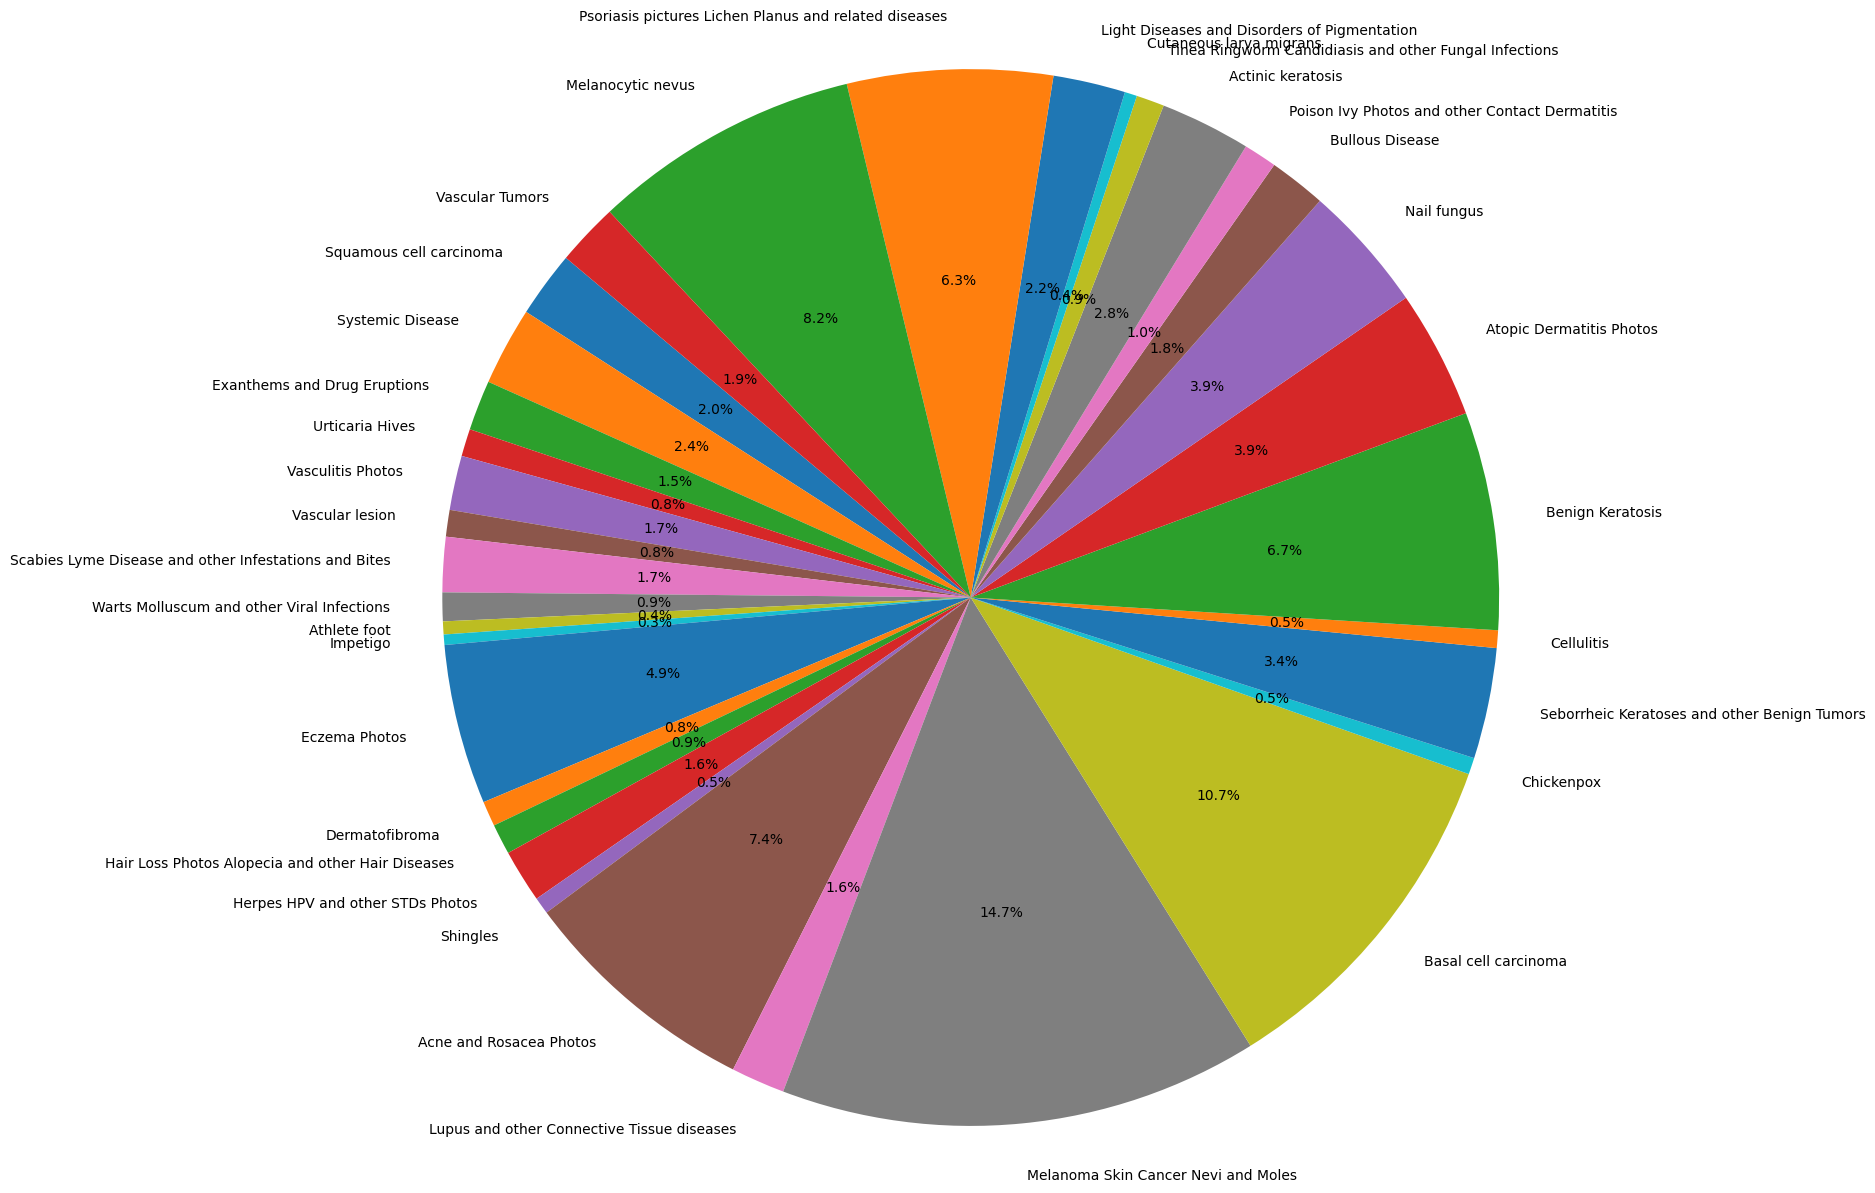

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_in_categories(train_dir):
    category_counts = {}
    for category in os.listdir(train_dir):
        category_dir = os.path.join(train_dir, category)
        if os.path.isdir(category_dir):
            image_count = len(os.listdir(category_dir))
            category_counts[category] = image_count
    return category_counts

def plot_pie_chart(category_counts):
    categories = list(category_counts.keys())
    counts = list(category_counts.values())

    plt.figure(figsize=(15, 15))
    plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    #plt.title('Количество изображений в каждой категории')
    plt.show()

train_dir = "/content/DermDiagnose_dataset_v2/train"
category_counts = count_images_in_categories(train_dir)
plot_pie_chart(category_counts)



In [ ]:
!ls '/content/DermDiagnose_dataset_v2'

test  train  val


In [ ]:
DATA_DIR = '/content/DermDiagnose_dataset_v2'

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 10.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8x-cls.pt")

results = model.train(data=DATA_DIR, epochs=10, dropout = 0.5, imgsz=256)

100%|██████████| 110M/110M [00:00<00:00, 384MB/s] 


Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8x-cls.pt, data=/content/DermDiagnose_dataset_v2, epochs=10, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 6.23M/6.23M [00:00<00:00, 158MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/DermDiagnose_dataset_v2/train... 21697 images, 0 corrupt: 100%|██████████| 21697/21697 [00:39<00:00, 552.34it/s]


train: New cache created: /content/DermDiagnose_dataset_v2/train.cache


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/DermDiagnose_dataset_v2/val... 4654 images, 0 corrupt: 100%|██████████| 4654/4654 [00:08<00:00, 543.21it/s]


val: New cache created: /content/DermDiagnose_dataset_v2/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 10 epochs...


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem       loss  Instances       Size


       1/10      2.57G      3.611         16        256:   0%|          | 6/1357 [00:02<06:51,  3.28it/s]

       1/10      2.57G      3.604         16        256:   1%|          | 10/1357 [00:04<06:17,  3.56it/s]
100%|██████████| 755k/755k [00:00<00:00, 38.5MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 146/146 [01:22<00:00,  1.76it/s]

                   all      0.528      0.871



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 146/146 [01:20<00:00,  1.80it/s]

                   all      0.582      0.899



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 146/146 [01:18<00:00,  1.85it/s]

                   all      0.584      0.909



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 146/146 [01:16<00:00,  1.92it/s]

                   all      0.619      0.915



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 146/146 [01:20<00:00,  1.81it/s]

                   all      0.646      0.931



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 146/146 [01:23<00:00,  1.75it/s]

                   all      0.671      0.938



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 146/146 [01:19<00:00,  1.84it/s]

                   all      0.704      0.949



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 146/146 [01:24<00:00,  1.72it/s]

                   all      0.713       0.95



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 146/146 [01:19<00:00,  1.83it/s]

                   all      0.726      0.955



      Epoch    GPU_mem       loss  Instances       Size


      10/10      2.87G     0.6306          1        256: 100%|██████████| 1357/1357 [08:48<00:00,  2.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 146/146 [01:25<00:00,  1.71it/s]

                   all      0.736      0.957



10 epochs completed in 1.681 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 112.6MB
Optimizer stripped from runs/classify/train/weights/best.pt, 112.6MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-cls summary (fused): 133 layers, 56166754 parameters, 0 gradients, 153.8 GFLOPs
train: /content/DermDiagnose_dataset_v2/train... found 21697 images in 34 classes ✅ 
val: /content/DermDiagnose_dataset_v2/val... found 4654 images in 34 classes ✅ 
test: /content/DermDiagnose_dataset_v2/test... found 4667 images in 34 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 146/146 [01:18<00:00,  1.87it/s]


                   all      0.737      0.957
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


In [ ]:
#!scp -r /content/runs '/content/drive/MyDrive/DermDiagnose/'

In [ ]:
model.val(data='/content/DermDiagnose_dataset_v2/')

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-cls summary (fused): 133 layers, 56166754 parameters, 0 gradients, 153.8 GFLOPs
train: /content/DermDiagnose_dataset_v2/train... found 21697 images in 34 classes ✅ 
val: /content/DermDiagnose_dataset_v2/val... found 4654 images in 34 classes ✅ 
test: /content/DermDiagnose_dataset_v2/test... found 4667 images in 34 classes ✅ 


val: Scanning /content/DermDiagnose_dataset_v2/val... 4654 images, 0 corrupt: 100%|██████████| 4654/4654 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
               classes   top1_acc   top5_acc:   0%|          | 0/291 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
               classes   top1_acc   top5_acc: 100%|██████████| 291/291 [01:37<00:00,  2.99it/s]


                   all      0.737      0.957
Speed: 0.1ms preprocess, 5.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d817ab6b8e0>
curves: []
curves_results: []
fitness: 0.8469058871269226
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7367855310440063, 'metrics/accuracy_top5': 0.9570262432098389, 'fitness': 0.8469058871269226}
save_dir: PosixPath('runs/classify/train2')
speed: {'preprocess': 0.09318344778496153, 'inference': 5.282413462584347, 'loss': 0.0011556180290874618, 'postprocess': 0.002111546410272497}
task: 'classify'
top1: 0.7367855310440063
top5: 0.9570262432098389

In [ ]:
import shutil
shutil.rmtree('/content/DermDiagnose_dataset_v2/val')

In [ ]:
# Исходный путь к папке
source_dir = "/content/DermDiagnose_dataset_v2/test"

# Новый путь к папке
destination_dir = "/content/DermDiagnose_dataset_v2/val"

# Переименование папки
os.rename(source_dir, destination_dir)

In [ ]:
model.val(data='/content/DermDiagnose_dataset_v2/')

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
train: /content/DermDiagnose_dataset_v2/train... found 21697 images in 34 classes ✅ 
val: /content/DermDiagnose_dataset_v2/val... found 4667 images in 34 classes ✅ 
test: None...


val: Scanning /content/DermDiagnose_dataset_v2/val... 4667 images, 0 corrupt: 100%|██████████| 4667/4667 [00:09<00:00, 507.56it/s]


val: New cache created: /content/DermDiagnose_dataset_v2/val.cache


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
               classes   top1_acc   top5_acc: 100%|██████████| 292/292 [01:31<00:00,  3.19it/s]


                   all      0.734      0.957
Speed: 0.1ms preprocess, 5.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d817af0a890>
curves: []
curves_results: []
fitness: 0.8452967703342438
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7340904474258423, 'metrics/accuracy_top5': 0.9565030932426453, 'fitness': 0.8452967703342438}
save_dir: PosixPath('runs/classify/train3')
speed: {'preprocess': 0.11720196552493216, 'inference': 5.2663730251883605, 'loss': 0.0011102530489852705, 'postprocess': 0.0009297149605891014}
task: 'classify'
top1: 0.7340904474258423
top5: 0.9565030932426453